# Proyecto Data Science I: Parte I

## Contenido:
[ABSTRACT](#abstract)
1. [Introducción](#introduccion)
    <br> 1.1. [Hipotesis Iniciales](#hipotesis)
    <br> 1.2. [Consideraciones](#consideraciones)
2. [Descripcion del Dataset](#descripcion-dataset)
3. [Preparación inicial](#preparacion-inicial)
4. [Descripción de los datos](#descripcion-datos)
    <br> 4.1. [Información de los datos](#info-datos)
    <br> 4.2. [Describe - Variables Numéricas](#describe-numericas)
    <br> 4.3. [Describe - Variables No Numéricas](#describe-no-numericas)
5. [Análisis de datos](#analisis-datos)
    <br> 5.1. [Evolución temporal de los juegos](#evolucion-temporal)
    <br> 5.2. [Participación femenina en los juegos](#participacion-femenina)
    <br> 5.3. [Análisis peso y estatura](#analisis-peso-estatura)
    <br> 5.4. [Medallero Olímpico](#medallero-olimpico)

## *ABSTRACT* <a class="anchor" id="abstract"></a>

AQUI VA EL ASTRACT

## 1. Introducción <a class="anchor" id="introduccion"></a>

El presente documento se analizará una fuente de datos que contiene información sobre los juegos olimpicos modernos. En ella existe información sobre los deportistas participantes, los deportes, los comités participantes, el país anfitrión de los respectivos juegos y los resultados en términos de medallas.

El objetivo de este trabajo será establecer el comportamiento de ciertas variables de interés como son:

* ¿Como ha evolucionado el número de participantes a lo largo del tiempo?
* ¿Como ha evolucionado el numero de paises participantes?
* ¿Como ha evolucionado el numero de eventos/deportes?
* ¿Como ha evolucionado el peso y estatura de los participantes?
* Establecer la distribución del medallero olímpico y evaluar cuales son los países mas exitosos en terminos del numero de medallas obtenidas
* Estudiar las variables anteriores separadas por género y análizar la participación femenina en los juegos olímpicos

### 1.1. Hipótesis Iniciales <a class="anchor" id="hipotesis"></a>

Se establecen las siguientes hipótesis iniciales respecto a las variables consideradas:

* El numero de los participantes ha aumentado a lo largo del tiempo
* El numero de paises participantes ha aumentado en el tiempo
* El numero de eventos/deportes ha aumentado en el tiempo
* El peso y estatura de los participantes ha aumentado en el tiempo
* La participación femenina ha aumentado en el tiempo

### 1.2. Consideraciones  <a class="anchor" id="consideraciones"></a>

El presente dataset contiene información sobre actividades que no serán contempladas en las siguientes secciones:

* *Art Competitions*: Fue una categoría incluida en los juegos olimpicos de verano entre 1912 y 1948 que incluyen competencias en arquitectura, literatura, musica, pintura y escultura. Esta categoría no será considerada por no ser una actividad deportiva de desempeño físico.

* *Winter Olympics*: El dataset incluye información sobre los juegos olimpicos de invierno. Se mostrara un gráfico sobre la evolución de participación en estos juegos, sin embargo, en las secciones siguientes solo se pondrá énfasis en los juegos olimpicos de verano.

## 2. Descripción del Dataset <a class="anchor" id="descripcion-dataset"></a>

Este es un dataset historico con informacion sobre los juegos olimpicos de la era moderna, abarcando desde los juegos de Atenas 1896 hasta Rio 2016.

Las columnas que componen el dataset se describen a continuación

* ID - Numero único para cada atleta
* Name - Nombre del atleta
* Sex - Sexo masculino o femenino (M o F)
* Age - Edad como numero entero
* Height - Altura en centimetros
* Weight - Peso en kilogramos
* Team - Nombre del equipo
* NOC - Comité Olimpico Nacional (Codigo de 3 letras)
* Games - Año y temporada
* Year - Año de los juegos olimpicos
* Season - Temporada (verano o invierno)
* City - Ciudad anfitriona
* Sport - Deporte. Se debe tomar en cuenta que existieron las *"Art Competitions"* que no serán contempladas en el presente análisis.
* Event - Evento
* Medal - Medalla obtenida (Oro, plata, bronce o NA)

## 3. Preparación inicial <a class="anchor" id="preparacion-inicial"></a>

In [47]:
# Cargar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# Se ignoran alertas para mejorar aspecto del notebook
import warnings
warnings.filterwarnings("ignore")

In [48]:
# Cargar datos
df = pd.read_csv(filepath_or_buffer="./datasets/athlete_events.csv")

In [49]:
# Se eliminan del análisis los datos del deporte "Art Competitions"
df = df[df["Sport"]!="Art Competitions"]

In [50]:
# Definir el estilo de los gráficos de matplotlib
mpl.style.use("bmh")

## 4. Descripción de los datos <a class="anchor" id="descripcion-datos"></a>

### 4.1. Información de los datos <a class="anchor" id="info-datos"></a>

La información de los datos muestra que tenemos un total de 267538 entradas, según la columna ID. Se observa que las siguientes columnas tienen entradas nulas:

* Age
* Height
* Weight
* Medal

En el caso de las columnas Age, Height y Weight, se presume que los datos faltantes no fueron encuestados, ingresados a la base de datos o se perdió la información. En el caso de la columna Medal, es esperable que existan muchos datos nulos, pues solo algunos competidores obtienen medallas olímpicas.

In [51]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 267538 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      267538 non-null  int64  
 1   Name    267538 non-null  object 
 2   Sex     267538 non-null  object 
 3   Age     258571 non-null  float64
 4   Height  210886 non-null  float64
 5   Weight  208186 non-null  float64
 6   Team    267538 non-null  object 
 7   NOC     267538 non-null  object 
 8   Games   267538 non-null  object 
 9   Year    267538 non-null  int64  
 10  Season  267538 non-null  object 
 11  City    267538 non-null  object 
 12  Sport   267538 non-null  object 
 13  Event   267538 non-null  object 
 14  Medal   39627 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.7+ MB


### 4.2. Describe - Variables Numéricas<a class="anchor" id="describe-numericas"></a>

Se utiliza el metodo `describe()` para obtener los parámetros estadísticos mas relevantes de las variables numéricas del dataset. Las variables numéricas son:

* ID : Se identifica un total de 267538 entradas. Esta columna no tiene otra relevancia estadísticas, mas que para identificar las entradas.
* Age : Se observa un rango de edades de entre 10 y 72 años, con un promedio de 25.3 años y una desviación estándar de +/-5.9 años.
* Height : Se observa un rango de estaturas de entre 127 y 226 cm, con un promedio de 175.3 cm y una desviación estándar de +/-10.5 cm.
* Weight : Se observa un rango de pesos de entre 25 y 214 kg, con un promedio de 70.7 kg y una desviación estándar de +/-14.3 kg.
* Year : Se observa que los años considerados se encuentran entre 1896 y 2016.

In [52]:
# Descripción de variables numéricas
df.describe()

,ID,Age,Height,Weight,Year
count,267538.000000,258571.000000,210886.000000,208186.000000,267538.000000
mean,68272.347054,25.315275,175.339164,70.701181,1978.982963
std,39029.583640,5.871024,10.518800,14.349220,29.601747
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34661.000000,21.000000,168.000000,60.000000,1960.000000
50%,68266.000000,24.000000,175.000000,70.000000,1988.000000
75%,102121.000000,28.000000,183.000000,79.000000,2004.000000
max,135571.000000,72.000000,226.000000,214.000000,2016.000000


### 4.3. Describe - Variables No Numéricas  <a class="anchor" id="describe-no-numericas"></a>

Se utiliza el metodo `describe(exclude="number")` para obtener los parámetros estadísticos mas relevantes de las variables no-numéricas del dataset. Las variables no-numéricas son:

* Name :Se observa que de 267538 entradas hay 132956 únicas.
* Sex : Se observa que la mayor cantidad de participantes han sido Masculinos, con 193393 entradas.
* Team : El equipo con mayor cantidad de participanes es Estados Unidos.
* NOC : La comisión con mayor cantidad de participantes es USA.
* Games : Los juegos con mayor cantidad de participantes fueron los juegos olimpicos de verano de 2000.
* Season : La mayor cantidad de participantes han participado en juegos de verano.
* City : La mayor cantidad de participantes han participado en juegos realizados en Londres.
* Sport : El deporte con la mayor cantidad de participantes ha sido el Atletismo.
* Event : El evento con mayor cantidad de participantes ha sido el Futbol Masculino.
* Medal : La mayor cantidad de medallas han sido de oro.

In [53]:
# Descripción de variables categóricas
df.describe(exclude="number")

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,267538,267538,267538,267538,267538,267538,267538,267538,267538,39627
unique,132956,2,1183,229,51,2,42,65,736,3
top,Heikki Ilmari Savolainen,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,39,193393,17285,18291,13821,218974,21955,38624,5733,13323


## 5. Analisis de datos<a class="anchor" id="analisis-datos"></a>

### 5.1. Evolución temporal de los juegos<a class="anchor" id="evolucion-temporal"></a>

Se presentan 3 gráficos que muestran la evolución temporal de 3 variables de interes 1) Numero de participantes, 2) Numero de comites y 3) Numero de Eventos. Estas variables se muestran separadas para los juegos olimpicos de "Verano" e "Invierno".

Se puede observar, que las 3 variables presentan un crecimiento considerable en el tiempo para los juegos de Verano. Para los juegos de verano se puede comentar que:
* El número de participantes pasó de ser menos a 1500 en 1896 a mas 10000 participantes en 2016. El crecimiento ha sido de 60 veces respecto al número de participantes en 1896.
* El número de comités participantes pasó de ser menor que 25 en 1896 a mas de 200 en 2016. El crecimiento ha sido superior a 16 veces respecto al número de comités en 1896. 
* El número de eventos realizados pasó de ser alrededor de 50 en 1896 a alrededor de 300 en 2016. El crecimiento ha sido de 7 veces respecto al número de eventos en 1896.

Para los juegos de Invierno, las 3 variables estudiadas presentan crecimiento, sin embargo, este crecimiento ha sido menos pronunciado. Para los juegos de invierno se puede comentar que:
* Los juegos olimpicos de invierno se comenzaron a realizar en 1924.
* Se ha llegado a los valores de 2500 para el numero de participantes en 2016. El crecimiento ha sido de 10 veces respecto al número de participantes en 1924.
* Se ha llegado a los valores de 90 en el numero de comites. El crecimiento ha sido de 5 veces respecto al número de comités en 1924.
* Se ha llegado a los valores de 100 para el numero de eventos realizados. El crecimiento ha sido de 6 veces respecto al número de eventos en 1924.

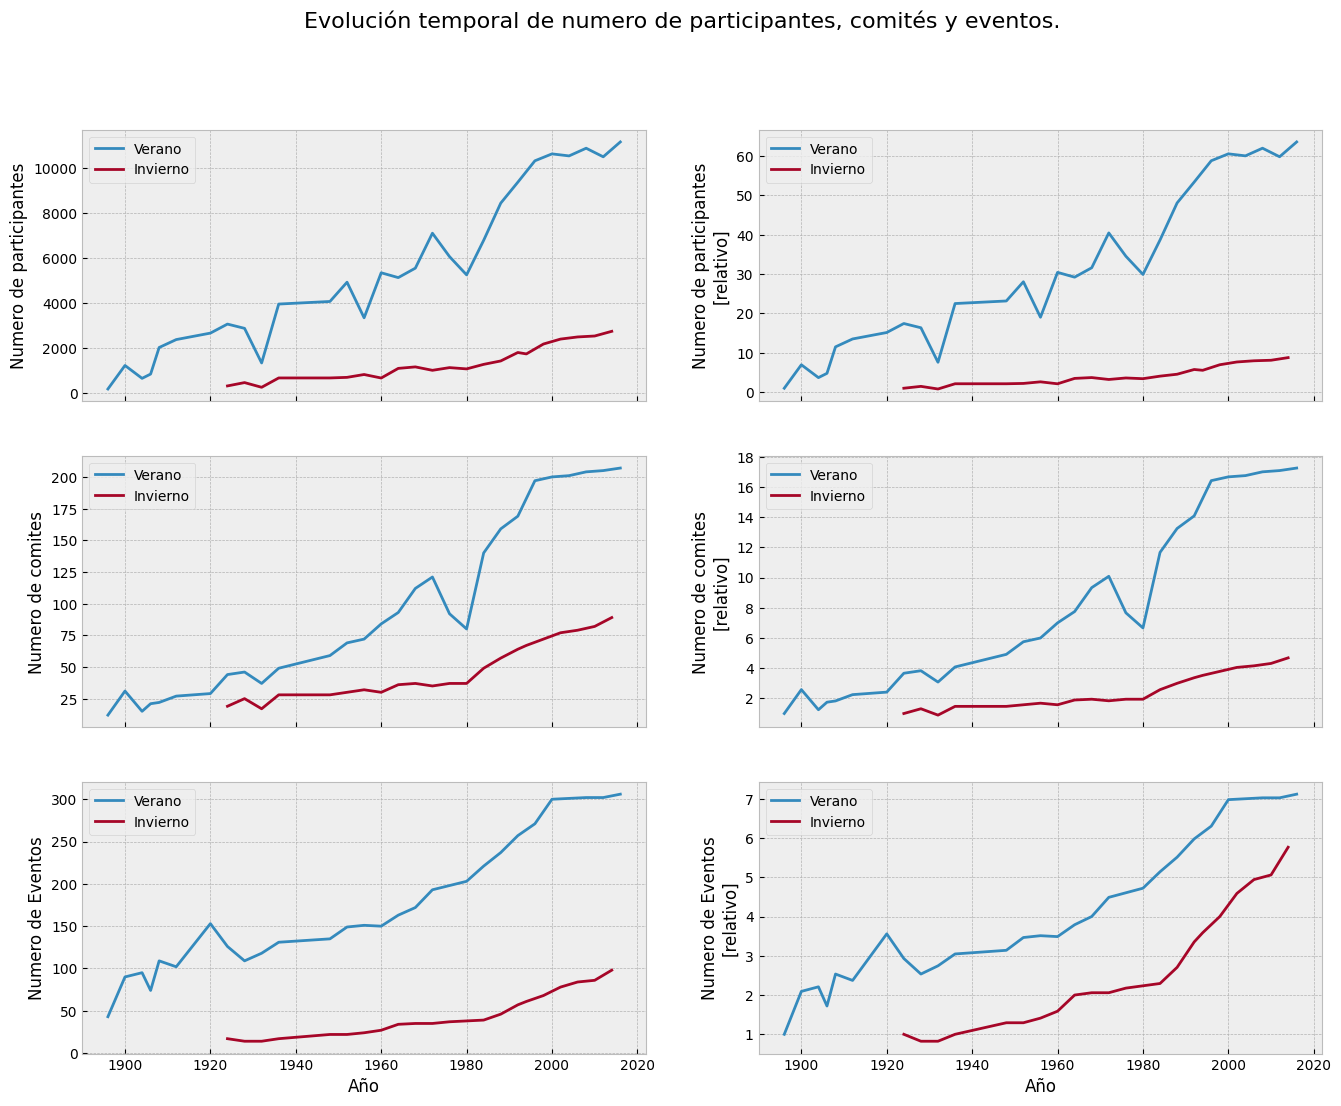

In [54]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16, 12), sharex=True)
fig.suptitle("Evolución temporal de numero de participantes, comités y eventos.", fontsize=16)

# Conteo de los datos agrupados por año y temporada
counts = df.groupby(["Year", "Season"]).nunique()
counts_summer = counts.xs("Summer", level=1)
counts_winter = counts.xs("Winter", level=1)

# Valores de x (en años) para verano e invierno
x_summer = counts_summer.index
x_winter = counts_winter.index

# -------------------------------------------------------------------
# Gráfico de evolución temporal de cantidad de participantes
y1_summer = counts_summer["ID"]
y1_winter = counts_winter["ID"]

ax1.plot(x_summer, y1_summer, label="Verano")
ax1.plot(x_winter, y1_winter, label="Invierno")
ax1.set_ylabel("Numero de participantes")
ax1.legend()

# Gráfico de evolución temporal de cantidad de participantes (en valores relativos)
ax2.plot(x_summer, y1_summer/y1_summer.iloc[0], label="Verano")
ax2.plot(x_winter, y1_winter/y1_winter.iloc[0], label="Invierno")
ax2.set_ylabel("Numero de participantes\n[relativo]")
ax2.legend()

# -------------------------------------------------------------------
# Gráfico de evolución temporal de la cantidad de comités participantes
y2_summer = counts_summer["NOC"]
y2_winter = counts_winter["NOC"]

ax3.plot(x_summer, y2_summer, label="Verano")
ax3.plot(x_winter, y2_winter, label="Invierno")
ax3.set_ylabel("Numero de comites")
ax3.legend()

# Gráfico de evolución temporal de la cantidad de comités participantes (en valores relativos)
ax4.plot(x_summer, y2_summer/y2_summer.iloc[0], label="Verano")
ax4.plot(x_winter, y2_winter/y2_winter.iloc[0], label="Invierno")
ax4.set_ylabel("Numero de comites\n[relativo]")
ax4.legend()

# -------------------------------------------------------------------
# Gráfico de evolución temporal del numero de eventos/deportes presentes
y3_summer = counts_summer["Event"]
y3_winter = counts_winter["Event"]

ax5.plot(x_summer, y3_summer, label="Verano")
ax5.plot(x_winter, y3_winter, label="Invierno")
ax5.set_xlabel("Año")
ax5.set_ylabel("Numero de Eventos")
ax5.legend()

# Gráfico de evolución temporal del numero de eventos/deportes presentes (en valores relativos)
ax6.plot(x_summer, y3_summer/y3_summer.iloc[0], label="Verano")
ax6.plot(x_winter, y3_winter/y3_winter.iloc[0], label="Invierno")
ax6.set_xlabel("Año")
ax6.set_ylabel("Numero de Eventos\n[relativo]")
ax6.legend()

### 5.2. Participación femenina en los juegos <a class="anchor" id="participacion-femenina"></a>

Se analizaran de ahora en adelante solo para los juegos olímpicos de verano.

En primer lugar, se analiza el número de participantes masculinos y femeninos. Se puede observar que la participación femenina comienza 4 años después en 1900 y que su participación fue aumentando de forma paulatina hasta el año 1980 en donde la participación femenina comienza a tener un crecimiento acelerado, pasando de 2000 participantes a más de 6000 entre 1980 y 2016. En ese mismo periodo, la participación masculina alcanza su máximo en el año 1992, para luego comenzar a declinar su participación.

In [55]:
# Se evalúan los datos solo para los juegos olimpicos de verano
df_summer = df.query("Season == 'Summer'")

[Text(0.5, 0, 'Año'),
 Text(0, 0.5, 'Numero de participantes'),
 Text(0.5, 1.0, 'Participación femenina vs masculina\nen el tiempo')]

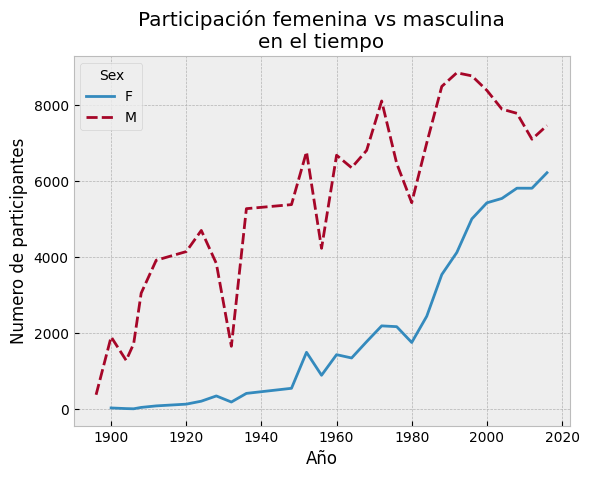

In [56]:
# Contar participantes masculinos y femeninos en los juegos de verano
count_by_sex = df_summer.pivot_table(values="ID", index="Year", columns="Sex", aggfunc="count")
# count_by_sex = count_by_sex.rename(columns={"M": "Masculino", "F": "Femenino"})

ax = sns.lineplot(data=count_by_sex)
ax.set(xlabel="Año", ylabel="Numero de participantes",
       title="Participación femenina vs masculina\nen el tiempo")

### 5.3. Análisis peso y estatura <a class="anchor" id="analisis-peso-estatura"></a>

#### 5.3.1. Completitud de los datos de peso y talla

Se debe verificar que existan datos suficientes para cada temporada de juegos. Se ha detectado que existen datos nulos para las columnas de Estatura (Height) y Peso (Weight) en los años iniciales de los juegos. Para realizar ésto, evaluaremos la proporción de datos no-nulos sobre la cantidad de participantes en cada año. Los análisis se realizan sólo sobre los juegos olimpicos de verano.

$$
Proporcion = \frac{NoNulos}{Total}
$$

Se muestra la evolución temporal en el siguiente gráfico, donde se puede apreciar que hasta el año 1960, el porcentaje de datos existentes para estatura y peso es alrededor del 20%. Posterior a 1960, podemos apreciar que el porcentaje de datos existentes se encuentra entre 80% y 100%. Es por este motivo que el análisis de peso y estatura será realizado sobre los años 1960 en adelante.

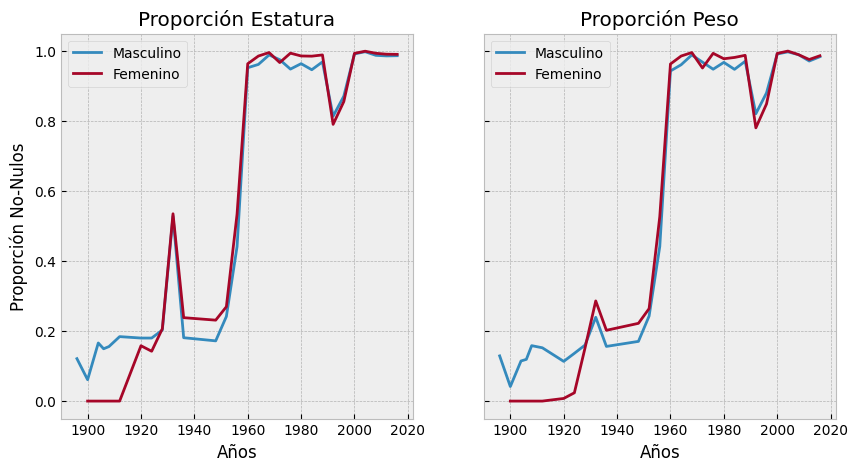

In [57]:
# Obtener proporción de datos no-nulos por año y por sexo para la estatura y peso
proportion = df_summer[["Year", "Sex", "Height", "Weight"]] \
    .groupby(["Year", "Sex"]) \
    .apply(lambda x: x.count()/(x.count()+x.isna().sum())) # x.count() cuenta los datos validos y x.isna().suma() cuenta los datos nulos.
proportion_men = proportion.xs("M", level=1)[["Height", "Weight"]]
proportion_women = proportion.xs("F", level=1)[["Height", "Weight"]]

fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=1, ncols=2, sharey=True)
ax1.plot(proportion_men.index, proportion_men.Height, label="Masculino")
ax1.plot(proportion_women.index, proportion_women.Height, label="Femenino")
ax1.set_title("Proporción Estatura")
ax1.set_xlabel("Años")
ax1.set_ylabel("Proporción No-Nulos")
ax1.legend()

ax2.plot(proportion_men.index, proportion_men.Weight, label="Masculino")
ax2.plot(proportion_women.index, proportion_women.Weight, label="Femenino")
ax2.set_title("Proporción Peso")
ax2.set_xlabel("Años")
ax2.legend()


#### 5.3.2. Parametros estadisticos de estatura y peso - Años > 1960

En las celdas siguientes se calculan los parámetros estadísticos de estatura y peso, asumiendo una distribución normal. Como se mencionó anteriormente, se consideran los años posteriores a 1960 debido a la falta de datos para años anteriores. A continuación se muestra la tabla resumen de dichos parámetros:

* **Estatura**

<table>
    <tr>
        <th>Sexo</th>
        <th>Media [cm]</th>
        <th>std. [cm]</th>
    </tr>
    <tr>
        <td>Masculino</td>
        <td>179.3</td>
        <td>10.0</td>
    </tr>
    <tr>
        <td>Femenino</td>
        <td>168.3</td>
        <td>9.3</td>
    </tr>
</table>


* **Peso**

<table>
    <tr>
        <th>Sexo</th>
        <th>Media [kg]</th>
        <th>std. [kg]</th>
    </tr>
    <tr>
        <td>Masculino</td>
        <td>76.0</td>
        <td>14.0</td>
    </tr>
    <tr>
        <td>Femenino</td>
        <td>60.1</td>
        <td>10.9</td>
    </tr>
</table>

In [58]:
# Parametros estadisticos para estatura y peso de participantes masculinos
df_summer_masculine = df.query("(Season == 'Summer') & (Sex == 'M') & (Year > 1960)")
df_summer_masculine.describe()[["Height","Weight"]]

,Height,Weight
count,99973.000000,99980.000000
mean,179.361808,76.053346
std,10.065396,14.029718
min,127.000000,37.000000
25%,172.000000,67.000000
50%,180.000000,75.000000
75%,186.000000,84.000000
max,226.000000,214.000000


In [59]:
# Parametros estadisticos para estatura y peso de participantes femeninos
df_summer_femenine = df.query("(Season == 'Summer') & (Sex == 'F') & (Year > 1960)")
df_summer_femenine.describe()[["Height","Weight"]]

,Height,Weight
count,51145.000000,50874.000000
mean,168.379685,60.191345
std,9.372578,10.980950
min,127.000000,25.000000
25%,163.000000,53.000000
50%,168.000000,60.000000
75%,175.000000,66.000000
max,213.000000,167.000000


#### 5.3.3. Distribución de estatura y peso

Se presentan histogramas para estatura y peso de los participantes, agrupados por sexo. Se puede apreciar que las variables se ajustan a una distribución normal y que tanto para estatura y peso las curvas para sexo masculino se encuentran a la derecha de las curvas para sexo femenino, lo que es esperable.

[Text(0.5, 0, 'Peso [kg]'),
 Text(0, 0.5, 'Conteo'),
 Text(0.5, 1.0, 'Distribución de pesos de los competidores\npor sexo')]

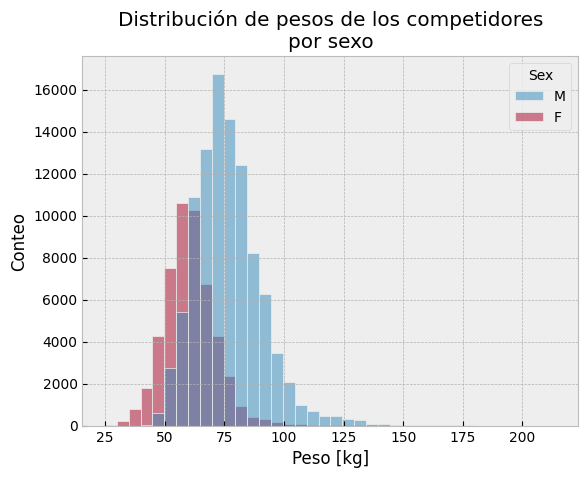

In [60]:
# Grafico de distribución de pesos de los competidores por sexo
df_summer = df.query("Season == 'Summer' & Year > 1960")
ax = sns.histplot(data=df_summer, x="Weight", hue="Sex", binwidth=5)
ax.set(xlabel="Peso [kg]", ylabel="Conteo", title="Distribución de pesos de los competidores\npor sexo")

[Text(0.5, 0, 'Estatura [cm]'),
 Text(0, 0.5, 'Conteo'),
 Text(0.5, 1.0, 'Distribución de estaturas de los competidores\npor sexo')]

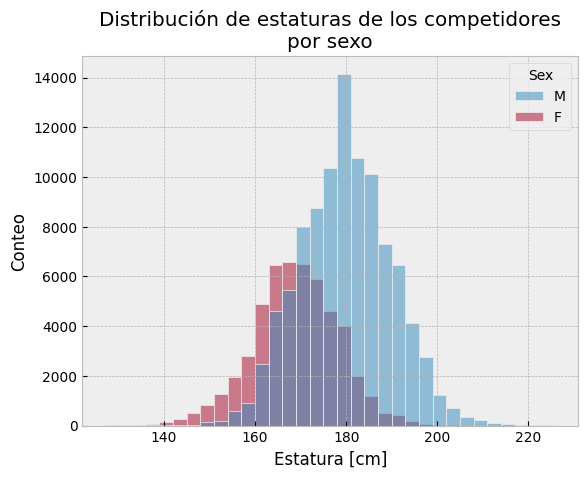

In [61]:
# Grafico de distribución de pesos de los competidores por sexo
ax = sns.histplot(data=df_summer, x="Height", hue="Sex", binwidth=3)
ax.set(xlabel="Estatura [cm]", ylabel="Conteo", title="Distribución de estaturas de los competidores\npor sexo")

#### 5.3.4. Evolución temporal de estaturas y pesos promedios y desviaciones en el tiempo.

Los graficos de evolución temporal de estatura y peso muestran una tendencia al alza de ambas variables en el tiempo, tanto para sexo masculino y femenino. Por otro lado, se puede observar que para todo tiempo, el peso y estatura promedio femenino se encuentra por debajo del promedio masculino menos una desviación estándar, es decir:

$$
\mu_F \le \mu_M - \sigma_M
$$

Esto implica que:

* Alrededor del 84% de los hombres posee una estatura mayor al 50% de las mujeres.
* Alrededor del 84% de los hombres posee un peso mayor al 50% de las mujeres.

Además, el promedio de estatura y peso femenino más una desviación estándar es menor al promedio de peso y estatura masculino para todo tiempo, es decir:

$$
\mu_F + \sigma_F \le \mu_M 
$$

Esto implica que:

* Alrededor del 84% de las mujeres posee una estatura menor al 50% de los hombres.
* Alrededor del 84% de las mujeres posee un peso menor al 50% de los hombres.


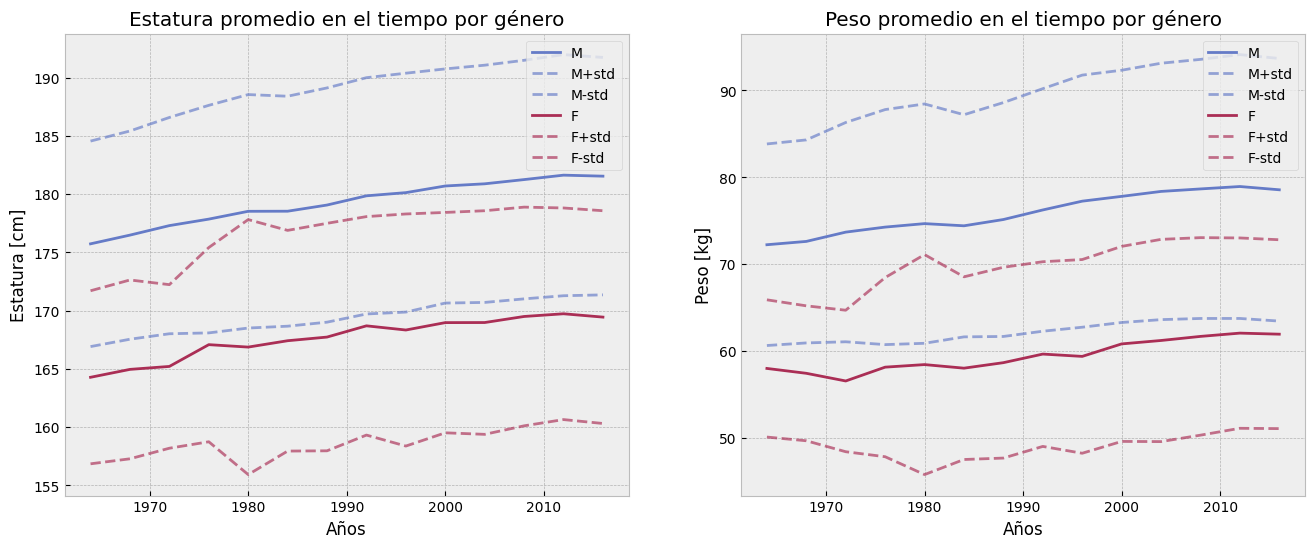

In [62]:
# Obtener promedios y desviaciones estandar por año y por sexo
avg_heights_by_sex = df_summer.pivot_table(values="Height", index="Year", columns="Sex", aggfunc="mean")
std_heights_by_sex = df_summer.pivot_table(values="Height", index="Year", columns="Sex", aggfunc="std")
heights = pd.DataFrame()
heights["M"] = avg_heights_by_sex["M"]
heights["F"] = avg_heights_by_sex["F"]
heights["M+std"] = avg_heights_by_sex["M"] + std_heights_by_sex["M"]
heights["M-std"] = avg_heights_by_sex["M"] - std_heights_by_sex["M"]
heights["F+std"] = avg_heights_by_sex["F"] + std_heights_by_sex["F"]
heights["F-std"] = avg_heights_by_sex["F"] - std_heights_by_sex["F"]


avg_weights_by_sex = df_summer.pivot_table(values="Weight", index="Year", columns="Sex", aggfunc="mean")
std_weights_by_sex = df_summer.pivot_table(values="Weight", index="Year", columns="Sex", aggfunc="std")
weights = pd.DataFrame()
weights["M"] = avg_weights_by_sex["M"]
weights["F"] = avg_weights_by_sex["F"]
weights["M+std"] = avg_weights_by_sex["M"] + std_weights_by_sex["M"]
weights["M-std"] = avg_weights_by_sex["M"] - std_weights_by_sex["M"]
weights["F+std"] = avg_weights_by_sex["F"] + std_weights_by_sex["F"]
weights["F-std"] = avg_weights_by_sex["F"] - std_weights_by_sex["F"]


fig, (ax1, ax2) = plt.subplots(figsize=(16, 6), ncols=2)
ax1.plot(heights.index, heights["M"], color="#657bc7", label="M")
ax1.plot(heights.index, heights["M+std"], "--", color="#657bc7aa", label="M+std")
ax1.plot(heights.index, heights["M-std"], "--",color="#657bc7aa", label="M-std")
ax1.plot(heights.index, heights["F"], color="#aa2e55", label="F")
ax1.plot(heights.index, heights["F+std"], "--", color="#aa2e55aa", label="F+std")
ax1.plot(heights.index, heights["F-std"], "--",color="#aa2e55aa", label="F-std")
ax1.set_title("Estatura promedio en el tiempo por género")
ax1.set_ylabel("Estatura [cm]")
ax1.set_xlabel("Años")
ax1.legend()

ax2.plot(weights.index, weights["M"], color="#657bc7", label="M")
ax2.plot(weights.index, weights["M+std"], "--", color="#657bc7aa", label="M+std")
ax2.plot(weights.index, weights["M-std"], "--",color="#657bc7aa", label="M-std")
ax2.plot(weights.index, weights["F"], color="#aa2e55", label="F")
ax2.plot(weights.index, weights["F+std"], "--", color="#aa2e55aa", label="F+std")
ax2.plot(weights.index, weights["F-std"], "--",color="#aa2e55aa", label="F-std")
ax2.set_title("Peso promedio en el tiempo por género")
ax2.set_ylabel("Peso [kg]")
ax2.set_xlabel("Años")
ax2.legend()

###  5.4. Medallero Olímpico <a class="anchor" id="medallero-olimpico"></a>

En esta sección se busca establecer cuales son los paises que han ganado la mayor cantidad de medallas. Recordar que se estan analizando los resultados únicamente para los eventos de verano.

Se presenta un top 20 de países cubriendo todos los años de participación en juegos olímpicos de verano y se obtiene que USA (Estados Unidos) es el país que mas medallas ha ganado, estando a aproximadamente 1500 medallas más que el segundo lugar, la union soviética (URS).

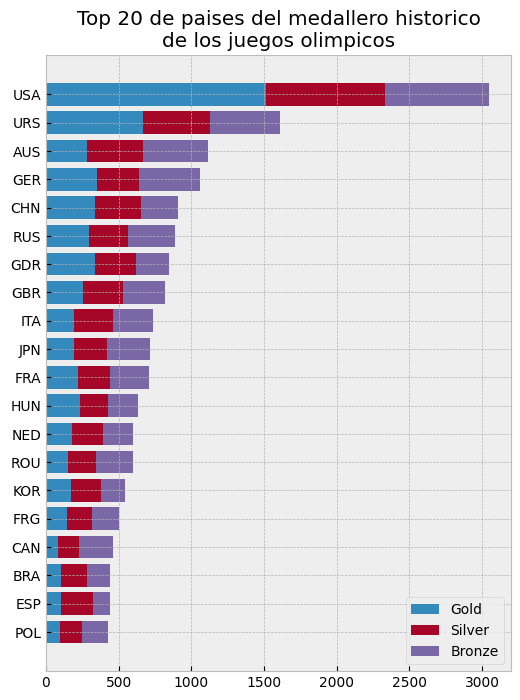

In [63]:
# Seleccionar medallas no nulas agrupadas por comité olímpico y por tipo de medalla (Gold, Silver, Bronze)
medals_by_noc_and_medal = df_summer[df_summer.Medal.notnull()] \
    .groupby(["NOC", "Medal"]) \
    .count()

medals = pd.DataFrame()
medals["Gold"] = medals_by_noc_and_medal.xs("Gold", level=1)["ID"]
medals["Silver"] = medals_by_noc_and_medal.xs("Silver", level=1)["ID"]
medals["Bronze"] = medals_by_noc_and_medal.xs("Bronze", level=1)["ID"]
medals = medals.replace(np.nan, 0)
medals = medals.convert_dtypes(np.int64)
medals["Total"] = medals["Gold"] + medals["Silver"] + medals["Bronze"]

# Obtener el top 20 de paises con mas medallas
medals = medals.sort_values("Total", ascending=False)
top_twenty = medals[:20]

fig, ax = plt.subplots(figsize=(6, 8))
ax.set_title("Top 20 de paises del medallero historico\nde los juegos olimpicos")
ax.barh(top_twenty.index, top_twenty["Gold"], label="Gold")
ax.barh(top_twenty.index, top_twenty["Silver"], label="Silver", left=top_twenty["Gold"])
ax.barh(top_twenty.index, top_twenty["Bronze"], label="Bronze", left=top_twenty["Gold"]+top_twenty["Silver"])
ax.invert_yaxis()
ax.legend()
